In [73]:
#%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import math
from functools import partial
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from scipy.stats import multivariate_normal

In [74]:
path = r"G:\AI学习资料\machine-learning-2014\机器学习课程2014源代码\python代码\ex8-anomaly detection and recommendation\data\ex8data1.mat"
raw_data = loadmat(path)
X = raw_data["X"]
Xval, Xtest, yval, ytest = train_test_split(raw_data['Xval'],
                                            raw_data['yval'].ravel(),
                                            random_state=30,
                                            test_size=0.5,
                                            stratify=raw_data['yval'].ravel()
                                           )
raw_data.keys(), [item.shape for item in [X, Xval, Xtest, yval, ytest]]

(dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval']),
 [(307, 2), (153, 2), (154, 2), (153,), (154,)])

#### plot raw data

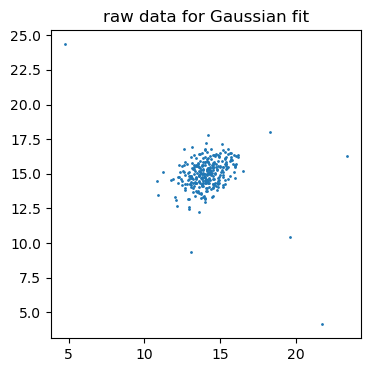

In [75]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(X[:,0],X[:,1],s=1)
ax.set_title("raw data for Gaussian fit")
plt.show()

In [76]:
def estimateGaussian(X):
    mu = np.mean(X,axis=0)
    sigma2 = np.var(X,axis=0)
    return mu, sigma2

In [77]:
def gaus(mu, sigma2, x):
    p = 1 / (pow(2 * math.pi*sigma2, 0.5)) * np.exp(-(x - mu)**2 / (2 * sigma2))
    return p

#### plot gaussian distribution

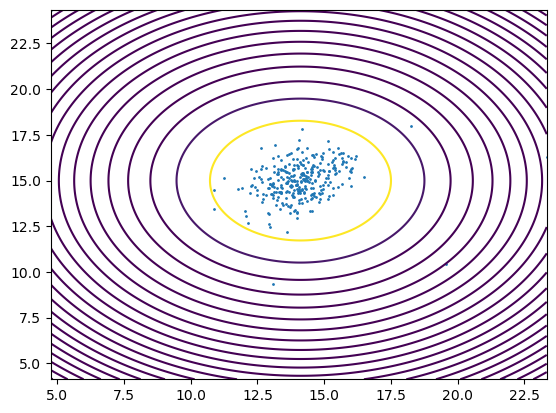

In [91]:
def plt_contourf(X):
    fig, ax = plt.subplots()
    ax.set_facecolor('white')
    mus, sigma2s = estimateGaussian(X)
    x1 = np.linspace(start=X[:,0].min(), stop=X[:,0].max(),num=1000)
    x2 = np.linspace(start=X[:,1].min(), stop=X[:,1].max(),num=1000)
    coords = np.meshgrid(x1,x2)
    gau_x1 = gaus(mus[0],sigma2s[0],coords[0])
    gau_x2 = gaus(mus[1],sigma2s[1],coords[1])
    gau_mat = gau_x1*gau_x2
    mi, ma = gau_mat.min(), gau_mat.max()
    ax.scatter(X[:,0],X[:,1],s=1)
    log = np.logspace(np.log(mi), np.log(ma), num=50)
    ax.contour(x1,x2,gau_mat,levels=log)
    plt.show()
plt_contourf(X)

In [52]:
mus, sigma2s = estimateGaussian(X)
pval_x1 = gaus(mus[0], sigma2s[0], Xval[:, 0])
pval_x2 = gaus(mus[0], sigma2s[1], Xval[:, 1])
pval = pval_x1 * pval_x2


def selectThreshold(pval, yval):
    gaus_min, gaus_max = pval.min(), pval.max()
    epss = np.linspace(gaus_min, gaus_max, num=10000)
    best_f, best_eps = 0, 0
    for eps in epss:
        pint = (pval<eps).astype('int')
        if f1_score(pint,yval) > best_f:
            best_f, best_eps = f1_score(pint,yval), eps
    return best_eps, best_f

In [53]:
eps, f1_score = selectThreshold(pval, yval)
eps, f1_score

(8.984030049403538e-06, 1.0)

#### High dimensional dataset

In [68]:
path = r"G:\AI学习资料\MachineLearningExercise\machine-learning-ex8\ex8\ex8data2.mat"
raw_data = loadmat(path)
X = raw_data["X"]
Xval, Xtest, yval, ytest = train_test_split(raw_data['Xval'],
                                            raw_data['yval'].ravel(),
                                            random_state=30,
                                            test_size=0.5,
                                            stratify=raw_data['yval'].ravel()
                                           )
raw_data.keys(), [item.shape for item in [X, Xval, Xtest, yval, ytest]]

(dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval']),
 [(1000, 11), (50, 11), (50, 11), (50,), (50,)])

In [69]:
def estimateGaussian(X):
    mus = np.mean(X,axis=0)
    sigmas = np.cov(X.T)
    return mus, sigmas

In [70]:
mu, sigma = estimateGaussian(X)
dist = multivariate_normal(mean=mu, cov=sigma)
pval = dist.pdf(Xval)

In [71]:
def selectThreshold(pval, yval):
    gaus_min, gaus_max = pval.min(), pval.max()
    epss = np.linspace(gaus_min, gaus_max, num=10000)
    best_f, best_eps = 0, 0
    for eps in epss:
        pint = (pval < eps).astype('int')
        if f1_score(pint, yval) > best_f:
            best_f, best_eps = f1_score(pint, yval), eps
    return best_eps, best_f

In [72]:
eps, f1_score = selectThreshold(pval, yval)
eps, f1_score

(2.0399385489057395e-19, 0.7272727272727272)